In [15]:
import matplotlib.pylab as plt
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [3]:
data = pd.read_csv("stock_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


In [7]:
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [9]:
data.shape

(340, 15)

In [11]:
data["Ticker Symbol"].unique().shape

# 340 companies represented

(340,)

In [12]:
data["GICS Sector"].unique().shape

# 11 sectors represented

(11,)

In [13]:
data["GICS Sub Industry"].unique().shape

# 140 industries

(104,)

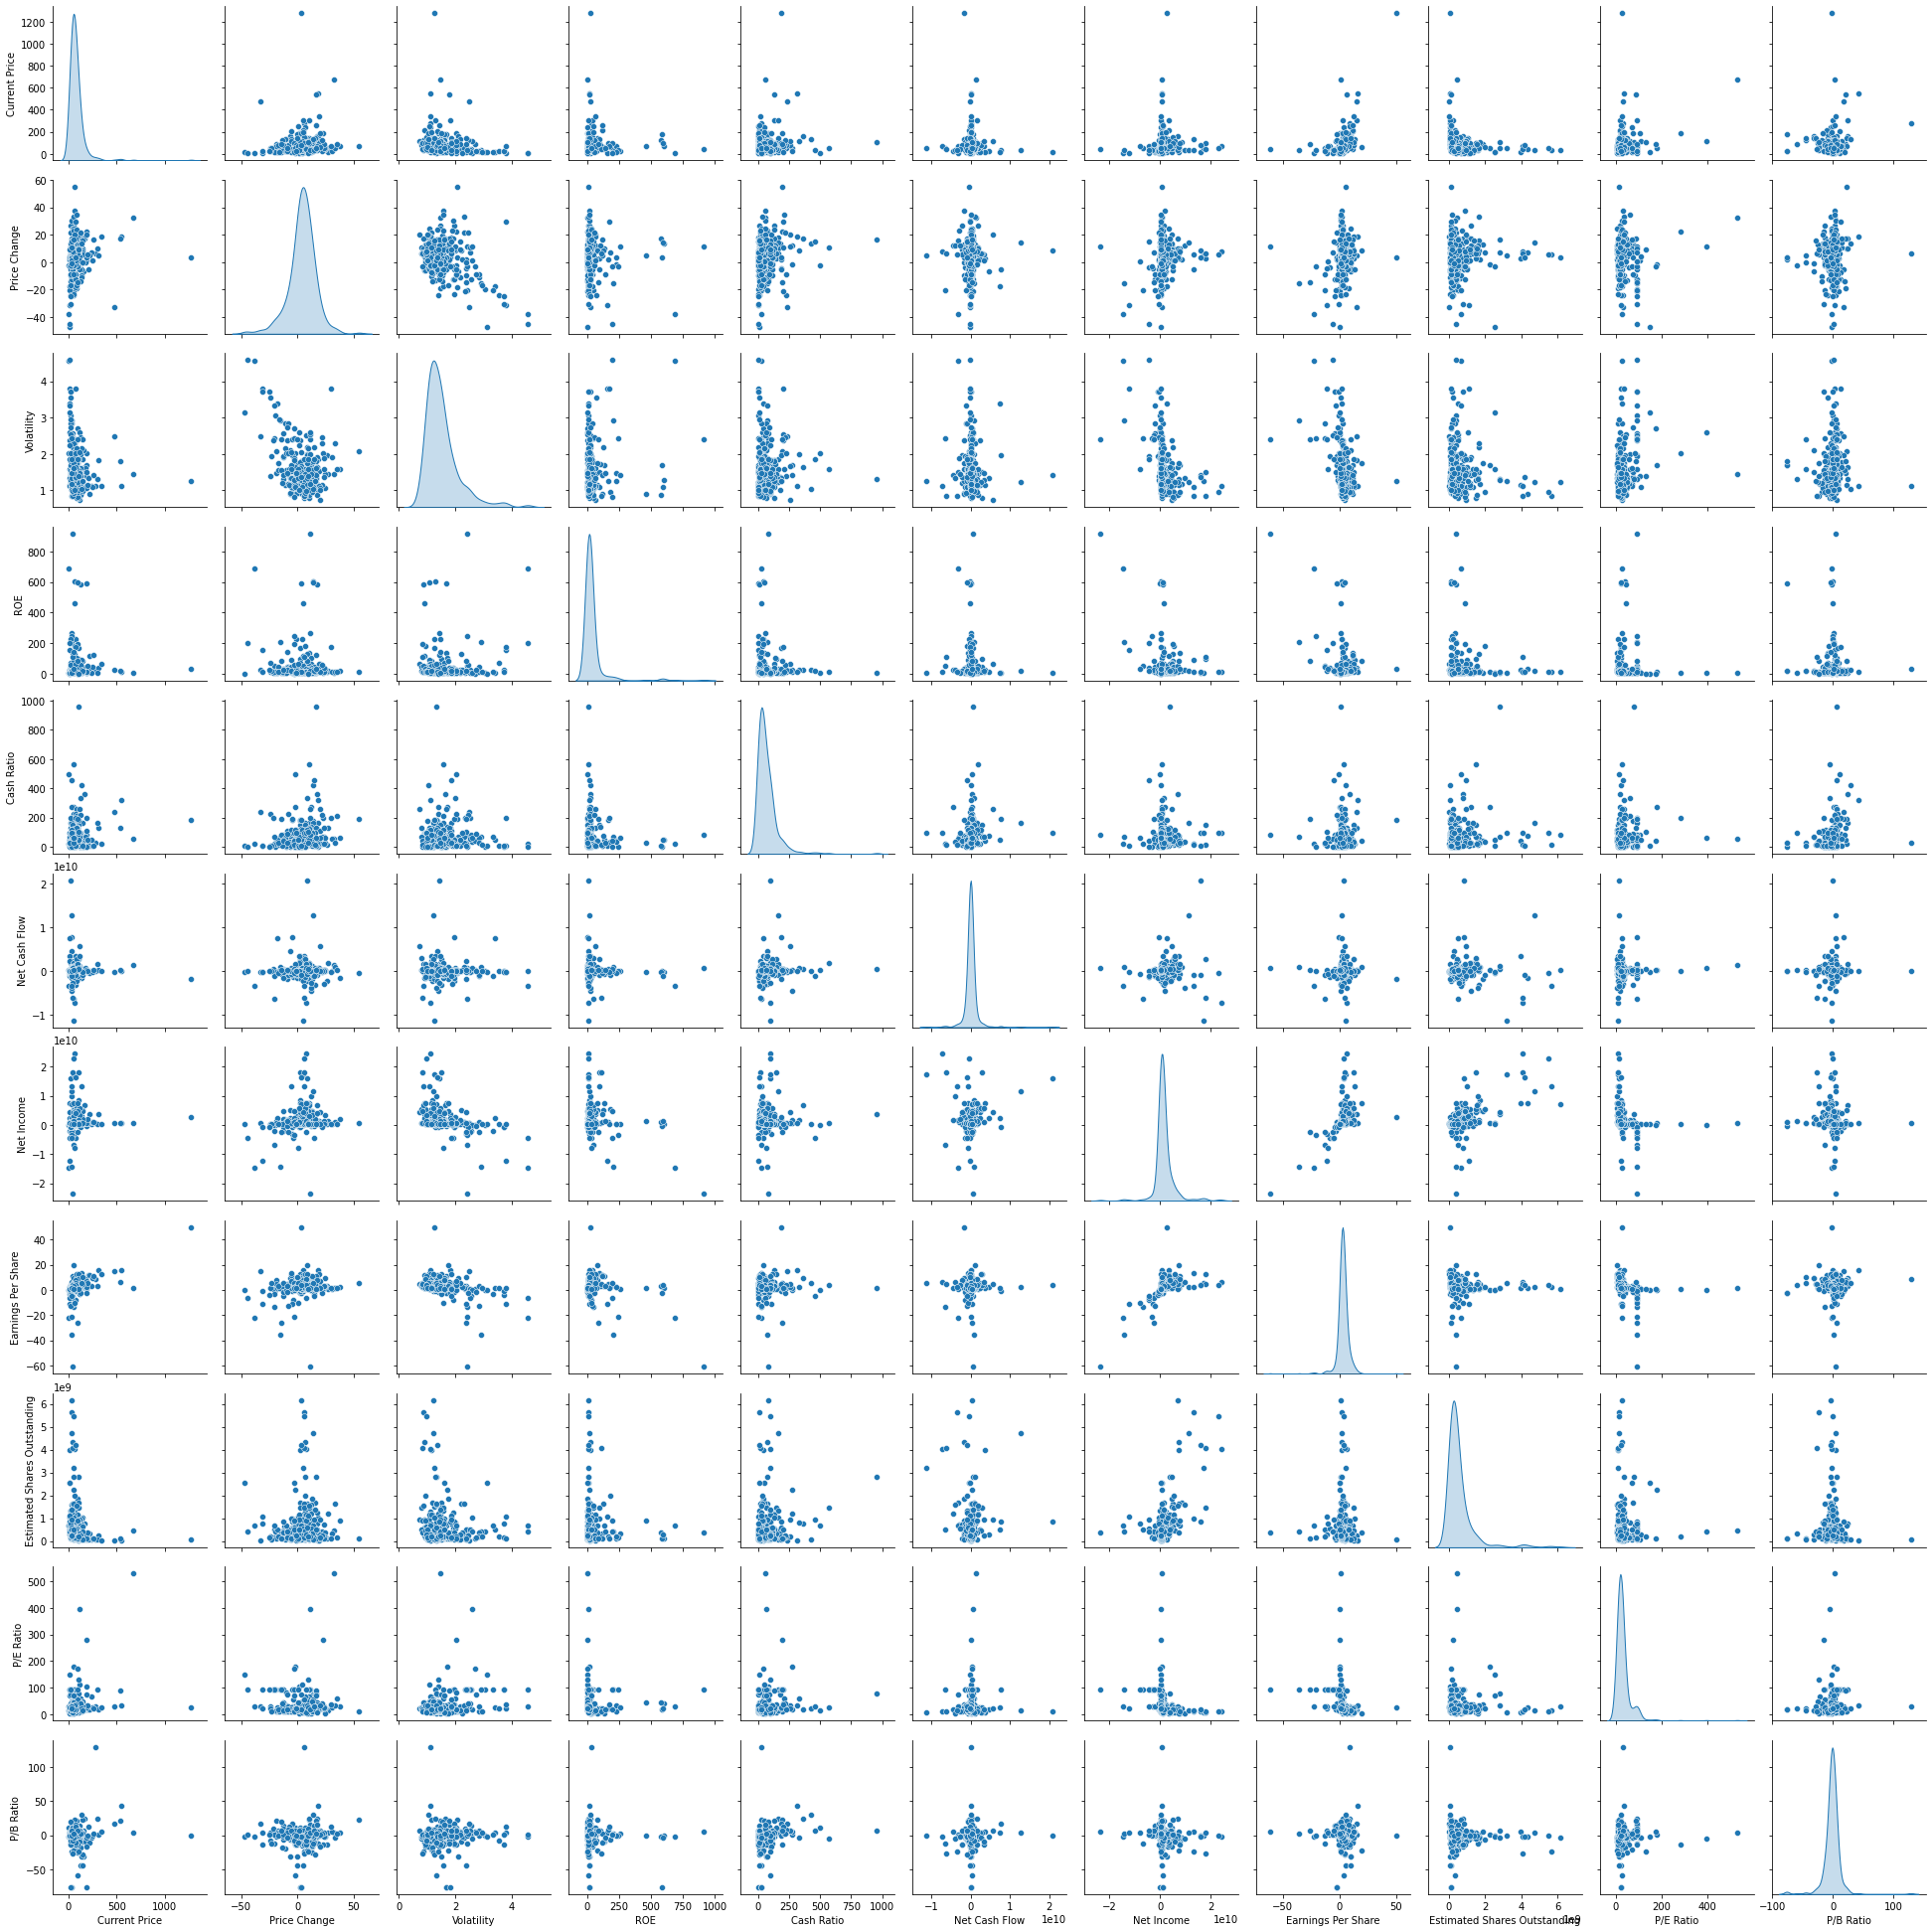

In [18]:
sns.pairplot(dataAttr, diag_kind='kde')

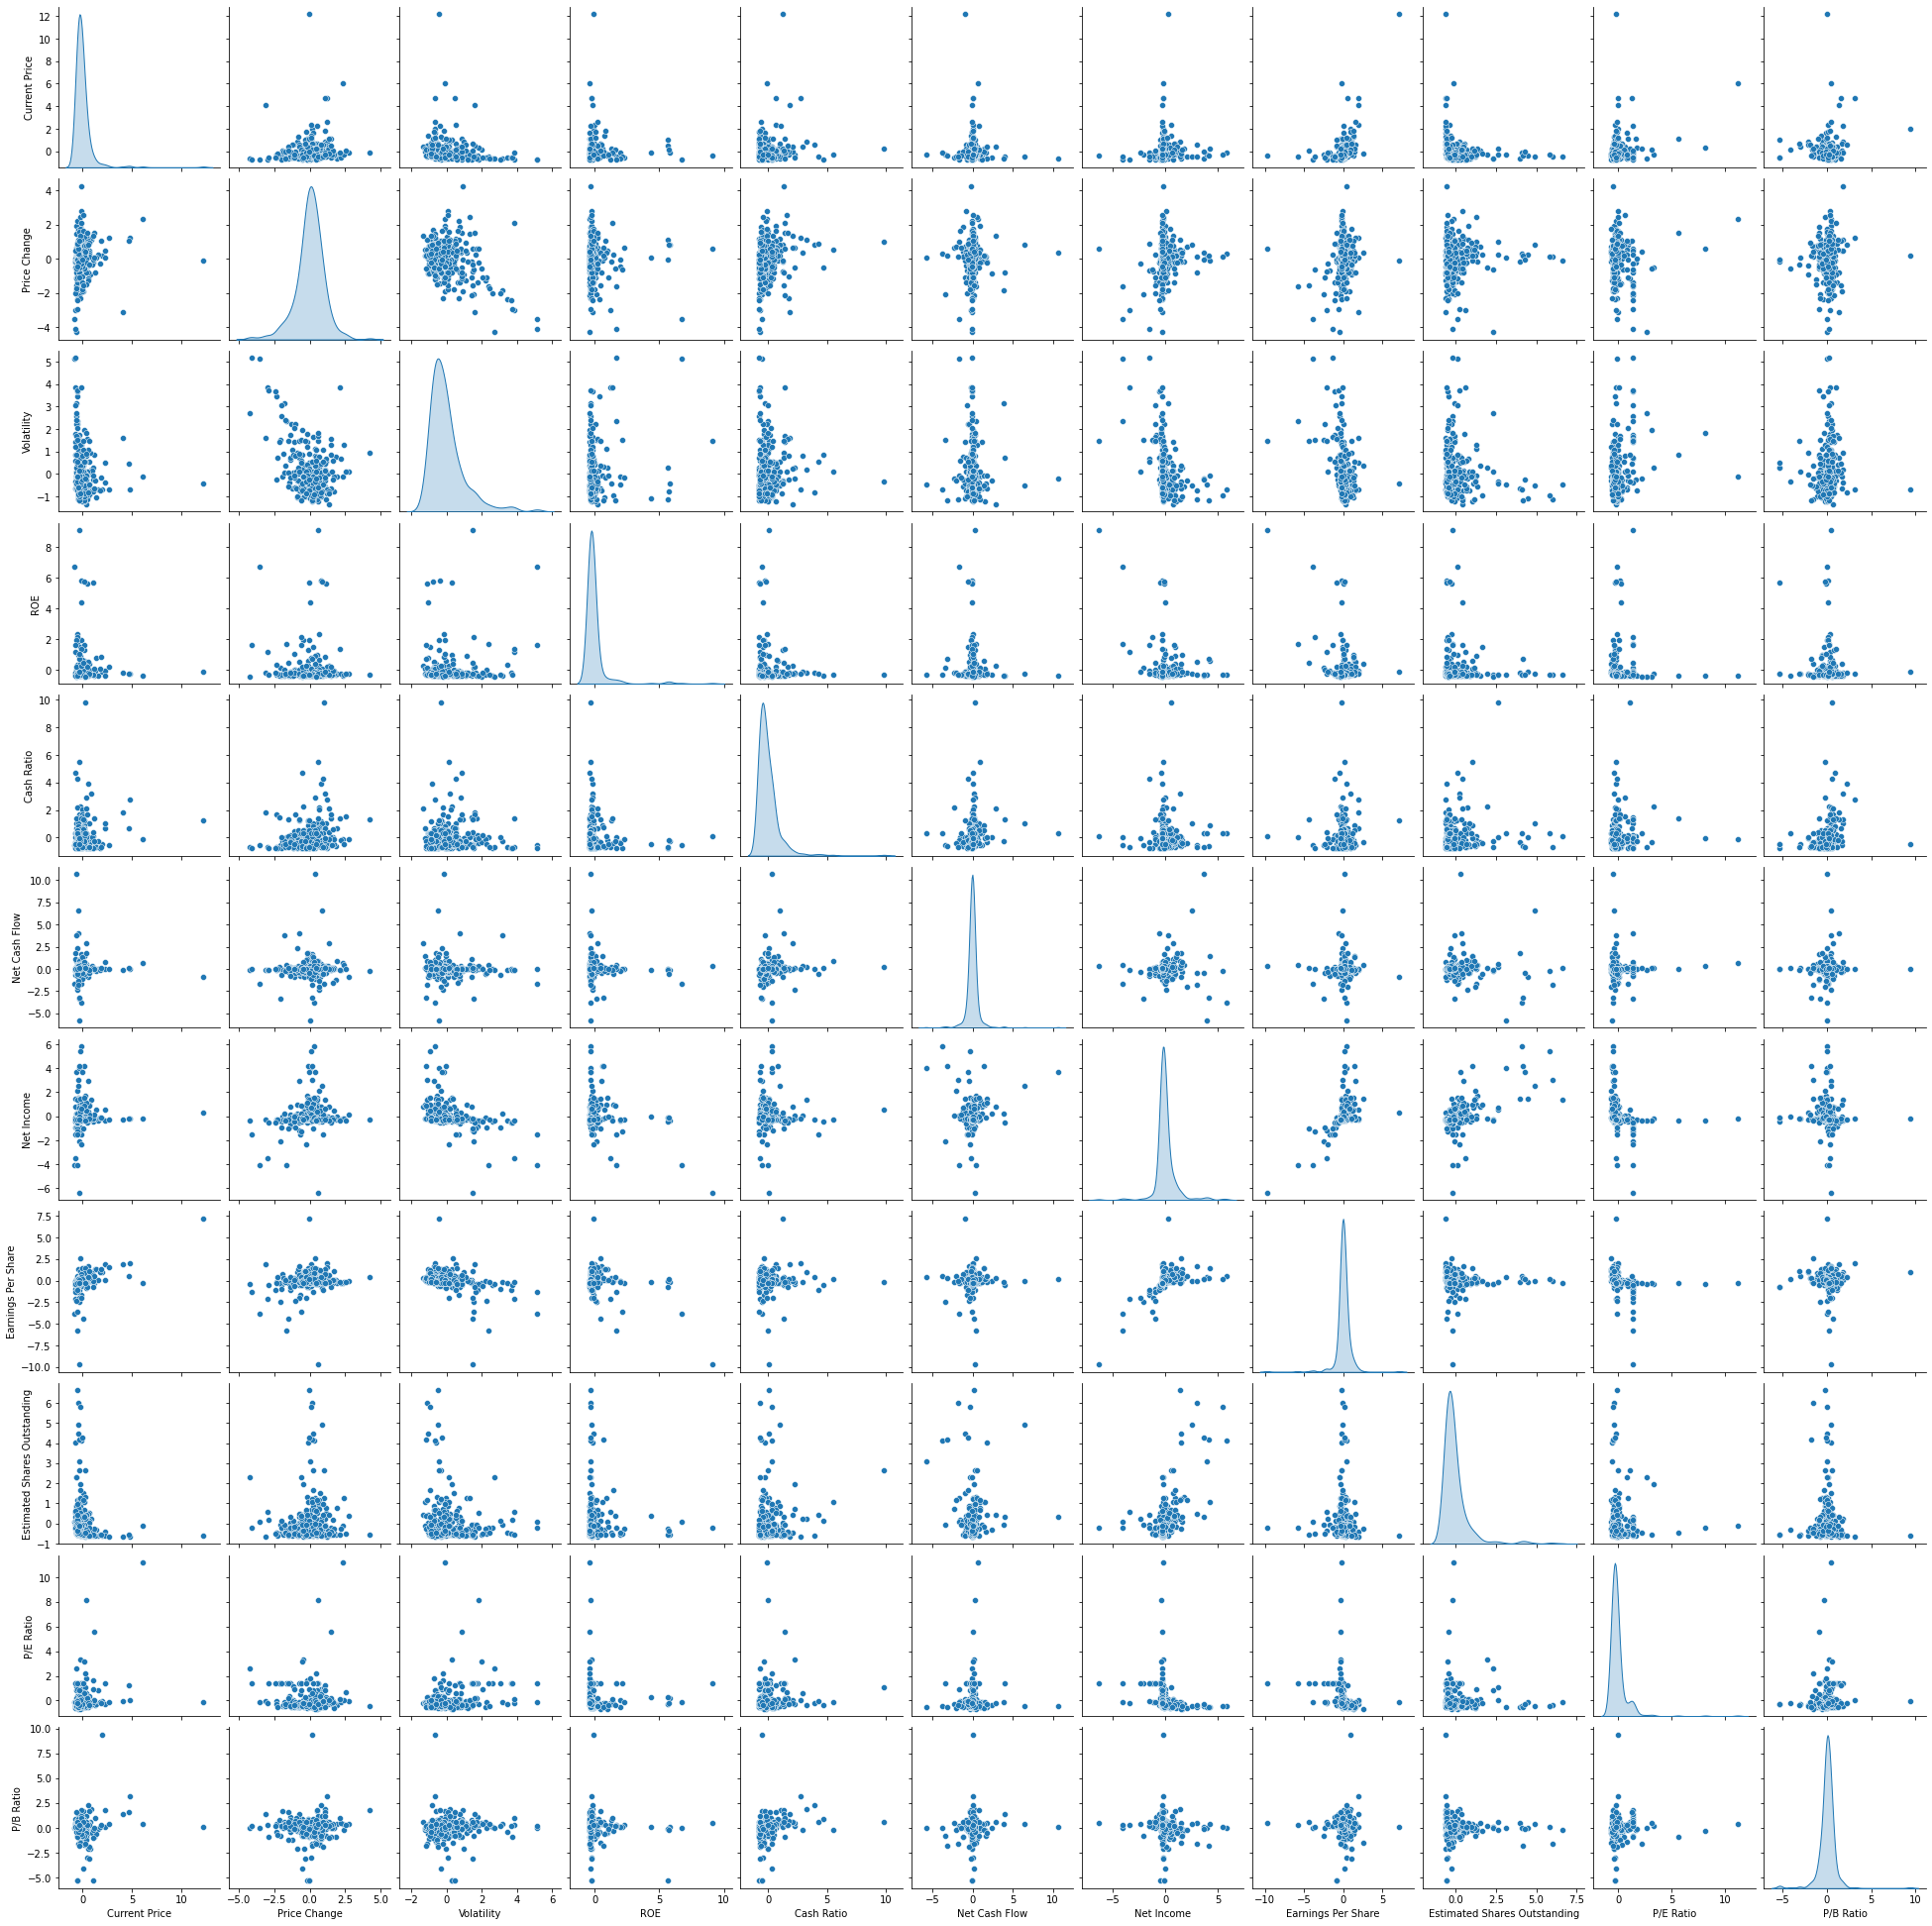

In [16]:
dataAttr = data.iloc[:, 4:]
dataAttrScaled = dataAttr.apply(zscore)
sns.pairplot(dataAttrScaled, diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the elbow method')

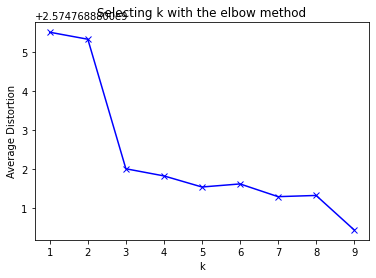

In [20]:
# finding optimal number of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(dataAttrScaled)
    prediction = model.predict(dataAttrScaled)
    meanDistortions.append(sum(np.min(cdist(dataAttr, model.cluster_centers_, 'euclidean'), axis=1)) / dataAttr.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the elbow method')

In [ ]:
# dataAttr - elbow around 4
# dataAttrScaled - elbow around 3 with a sharp decline from 2 to 3

In [24]:
# lets start with k = 3

final_model = KMeans(3)
final_model.fit(dataAttrScaled)
prediction = final_model.predict(dataAttrScaled)

#append the prediction
data['Group'] = prediction
dataAttr['Group'] = prediction
dataAttrScaled['Group'] = prediction
print("Groups Assigned : \n")
dataAttr.head()

Groups Assigned : 



,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Group
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,2
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,2
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,2
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,2
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,1


In [25]:
stockCluster = dataAttrScaled.groupby(['Group'])
stockCluster.mean()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Group,,,,,,,,,,,
0,-0.293323,0.225363,-0.593683,-0.139559,0.776616,0.362618,3.018134,0.150899,3.861986,-0.270027,-0.129856
1,-0.170348,-1.220756,2.152210,0.590570,0.007700,0.053323,-1.205889,-1.621070,-0.059873,1.777654,0.251083
2,0.032509,0.122140,-0.205984,-0.057634,-0.037820,-0.023071,-0.012467,0.169257,-0.177387,-0.180628,-0.021145


array([[<AxesSubplot:title={'center':'Cash Ratio'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Current Price'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Earnings Per Share'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Estimated Shares Outstanding'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'Net Cash Flow'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Net Income'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'P/B Ratio'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'P/E Ratio'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'Price Change'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'ROE'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Volatility'}, xlabel='[Group]'>,
        <AxesSubplot:>]], dtype=object)

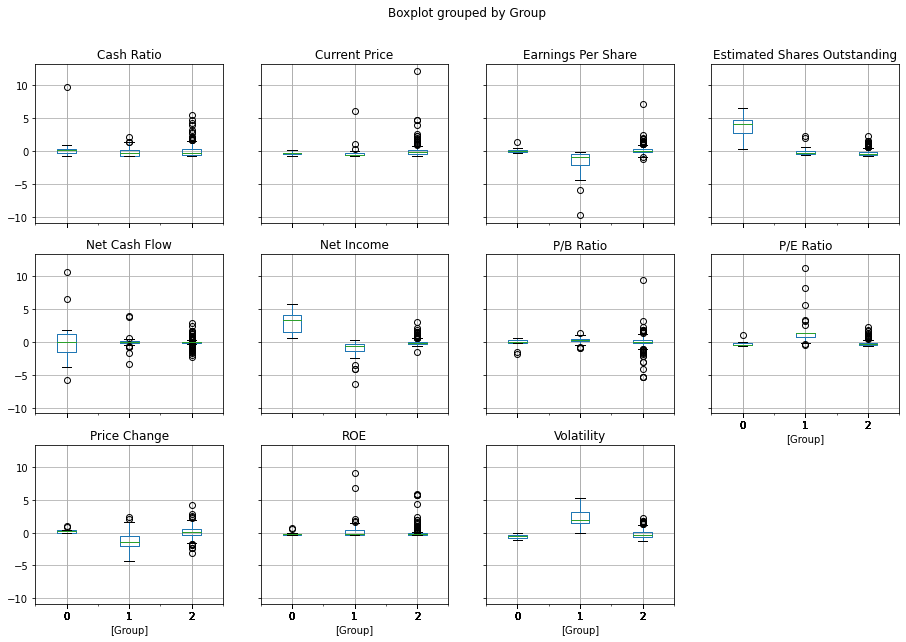

In [29]:
dataAttrScaled.boxplot(by='Group', layout = (3,4), figsize = (15,10))